# K-Nearest Neighbor Regression and Classification


---
Topics

*   1. Data Preparation
*   2. Comparing paramater values for classification
*   3. Standardization
*   4. Comparing paramater values for Regression
*   5. Take aways

#1. Data Preparation

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [67]:
from sklearn.datasets import load_breast_cancer
# Load dataset
cancer = load_breast_cancer()

# Create DataFrame with features
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Add target variable
df['target'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [68]:
# Rename target for clarity
df['cancer'] = df['target']

# Select features and target
X = df.drop(columns=['target', 'cancer'])
y = df['cancer']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#2. Comparing Paramater Values (classification)

In [69]:
# We start by fitting a KNN classifier with K = 5.
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)


y_pred_5 = knn_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred_5)


accuracy_5

0.9590643274853801

This gives us a baseline accuracy using K = 5 without any feature scaling.

In [70]:
#Evaluating how model performance changes as K varies.
k_values = range(1, 21)
accuracies = []


for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

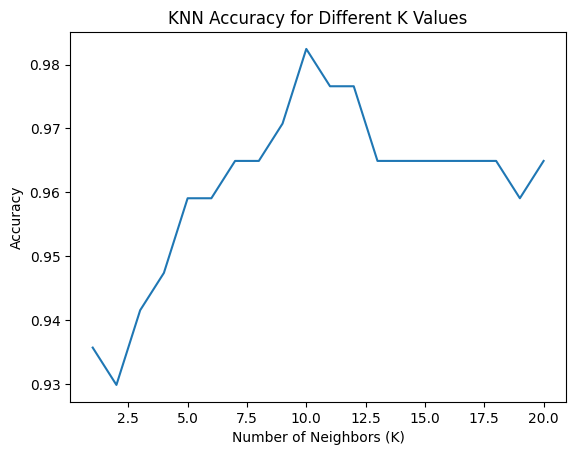

In [71]:
plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()

Small K values can lead to overfitting.

Larger K values smooth predictions but may underfit.

#3. Standardization

KNN relies on distance calculations. If features are on different scales, larger-valued features can dominate the distance metric.

Example:

Feature 1 ranges from 0–1

Feature 2 ranges from 0–1000

The second feature will heavily influence distance unless we scale the data.

**Standardization puts all variables on the same statistical scale using their mean and standard deviation, which is essential for distance-based models like KNN.**

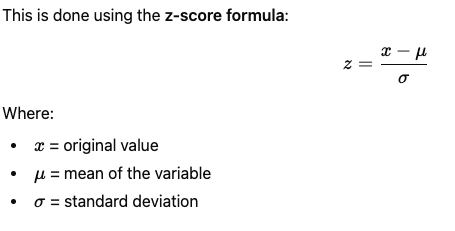

In [72]:
#Use StandardScaler to standardize features.
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
#Run KNN After Standardization (K = 5)
knn_5_scaled = KNeighborsClassifier(n_neighbors=5)
knn_5_scaled.fit(X_train_scaled, y_train)


y_pred_5_scaled = knn_5_scaled.predict(X_test_scaled)
accuracy_5_scaled = accuracy_score(y_test, y_pred_5_scaled)


accuracy_5_scaled

0.9590643274853801

Accuracy often improves after standardization.

Distance-based models like KNN benefit greatly from scaled features.

In [74]:
#KNN with Different K Values After Standardization
accuracies_scaled = []


for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  accuracies_scaled.append(accuracy_score(y_test, y_pred))

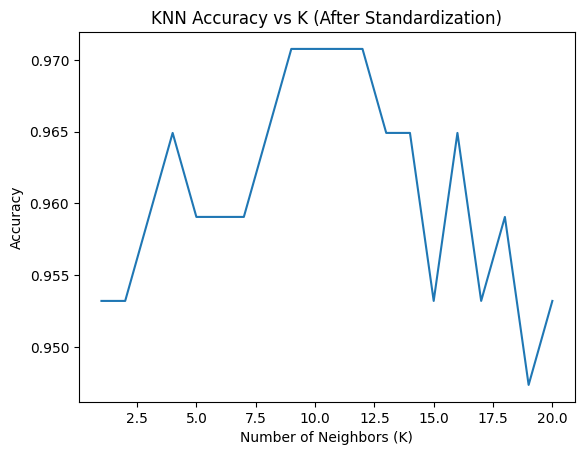

In [75]:
#Accuracy vs. K (Standardized Data)
plt.figure()
plt.plot(k_values, accuracies_scaled)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K (After Standardization)")
plt.show()

#4. Comparing paramater values for Regression

In [78]:
from sklearn.datasets import fetch_california_housing
# Load dataset
housing = fetch_california_housing()

df_reg = pd.DataFrame(
    housing.data, columns=housing.feature_names )

df_reg['price'] = housing.target

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define features and target for regression
X_reg = df_reg[['MedInc']]   # Median income
y_reg = df_reg['price']     # Median house value


Xr_train, Xr_test, yr_train, yr_test = train_test_split(
X_reg, y_reg, test_size=0.3, random_state=42
)


# Standardize features
scaler = StandardScaler()
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)


# Fit KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(Xr_train_scaled, yr_train)


# Predictions
yr_pred = knn_reg.predict(Xr_test_scaled)


# Evaluate
mse = mean_squared_error(yr_test, yr_pred)
mse

0.8096615251086272

KNN regression predicts values by averaging the target values of the nearest neighbors.

Scaling is just as important for regression as it is for classification

In [80]:
# Error metrics
mse = mean_squared_error(yr_test, yr_pred)
mse

rmse = mse ** 0.5
rmse

0.8998119387453287

This corresponds to about a $90,000 average prediction error.

#5. Take aways

* KNN can be used for both classification and regression.

* Model performance depends heavily on K and feature scaling.

* Standardization is essential for distance-based models.

* KNN is intuitive and effective as a baseline model.